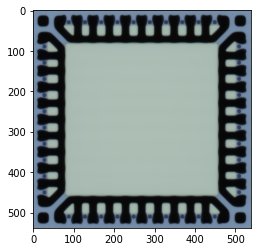

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

template_image_name="/git/dataSet/raw/unsupervised-learning/kangqiang/histogram/median/1101QFN-40L/lot1/ZM/tempalte.png"
image_name="/git/dataSet/raw/unsupervised-learning/kangqiang/image/1101QFN-40L/lot1/NG/ZM/1101QFN-40L-981-97_0_0_4562_14535.bmp"
template_img=cv2.imread(template_image_name,cv2.COLOR_BGR2RGB)
plt.imshow(template_img)

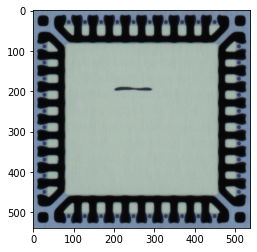

In [2]:
img=cv2.imread(image_name,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
def get_mask_from_backgroud_subtraction(image,template_image):
    img=cv2.GaussianBlur(image,(5,5),0)
    if template_image.shape[-1]!=3:
        template_img=template_image.transpose(1,2,0)
    else:
        template_img=template_image
    template_img=cv2.GaussianBlur(template_img,(5, 5),0)
    image_diff=cv2.absdiff(img[:538,::], template_img)
    kernel = np.ones((5,5),np.uint8)
    close_operated_image_diff = cv2.morphologyEx(image_diff, cv2.MORPH_CLOSE, kernel)
    _, thresholded = cv2.threshold(close_operated_image_diff, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    median = cv2.medianBlur(thresholded, 5)
    contours, _ = cv2.findContours(median, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print("contours nums is {}".format(len(contours)))
    max_countour = max(contours, key = cv2.contourArea)
    area=cv2.contourArea(max_countour)
    diff_mask = cv2.fillPoly(np.zeros_like(img), [max_countour], (255,255,255))

In [4]:
template_img.shape

(538, 538, 3)

In [5]:
img[:538,::].shape


(538, 538, 3)

In [6]:
diff_mask=get_mask_from_backgroud_subtraction(img,template_img)
plt.imshow(image_diff, cmap='gray')
cv2.imwrite("bmp.bmp",image_diff)

error: OpenCV(4.5.1) /tmp/pip-req-build-_a0ur5ao/opencv/modules/imgproc/src/thresh.cpp:1557: error: (-2:Unspecified error) in function 'double cv::threshold(cv::InputArray, cv::OutputArray, double, double, int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)


In [7]:
img=cv2.resize(img,(64,64)).astype(np.float32)
img0=cv2.resize(img0,(64,64)).astype(np.float32)

img=preprocess_image(img)
img0=preprocess_image(img0)

#img=cv2.GaussianBlur(img,(5, 5),0)
#img0=cv2.GaussianBlur(img0,(5, 5),0)

def closeingOpen(image):
    kernel = np.ones((5,5),np.uint8)
    close_operated_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    _, thresholded = cv2.threshold(close_operated_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    median = cv2.medianBlur(thresholded, 5)
    _, contours, _ = cv2.findContours(median, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image, contours, -1, (100, 0, 255),2)

NameError: name 'img0' is not defined

In [34]:
template_img=preprocess_image(template_img)



error: OpenCV(4.5.1) /tmp/pip-req-build-_a0ur5ao/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [18]:
#image_subtraction_diff=cv2.subtract(img,img0) 
image_subtraction_diff=cv2.absdiff(img,img0)

plt.imshow(image_subtraction_diff)

error: OpenCV(4.5.1) /tmp/pip-req-build-_a0ur5ao/opencv/modules/core/src/arithm.cpp:666: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [31]:
normalized_image_diff = cv2.normalize(image_subtraction_diff, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC3)
_,diff_mask = cv2.threshold(normalized_image_diff,50,255,cv2.THRESH_BINARY)

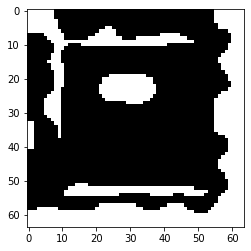

In [32]:
plt.imshow(diff_mask,cmap="gray")

In [26]:
cv2.bitwise_and(img,diff_mask)

error: OpenCV(4.5.2) /tmp/pip-req-build-_ha94g_z/opencv/modules/core/src/arithm.cpp:212: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'


In [94]:
img=cv2.fromarray(img)


AttributeError: module 'cv2.cv2' has no attribute 'fromarray'